## Step 1: Load and Explore the Dataset
I'll start by loading the dataset and displaying some basic information about it.

In [531]:
import pandas as pd

df = pd.read_csv("synthetic_health_data.csv")
df.head()

,UserID,Age,Gender,Height,Weight,BMI,Health Goals,Activity Level,ProteinA,ProteinB,...,Diet Type,Sleep Quality,Stress Level,Blood Pressure,Heart Rate,Blood Sugar,Recommended Diet,Exercise Plan,Stress Management,Supplement Recommendations
0,1,56,Male,161,99,38.192971,Stress Reduction,Lightly Active,4.582792,2.357291,...,Keto,5,7,120/85,90,79,Low Carb,Cardio,Therapy,"['Omega-3', 'Vitamin B12']"
1,2,46,Female,152,84,36.357341,Weight Loss,Very Active,4.134000,3.835596,...,Vegetarian,3,4,135/87,90,99,Balanced,Strength Training,Yoga,"['Vitamin B12', 'Omega-3']"
2,3,32,Male,194,50,13.285153,Weight Loss,Moderately Active,3.798821,4.975136,...,Gluten Free,5,2,124/78,95,102,Low Carb,Strength Training,Yoga,"['Omega-3', 'Vitamin B12']"
3,4,60,Other,167,73,26.175195,Weight Loss,Sedentary,3.467776,2.258516,...,No restrictions,8,9,121/87,69,88,Balanced,Strength Training,Meditation,"['Vitamin D', 'Omega-3']"
4,5,25,Male,189,85,23.795526,Stress Reduction,Very Active,4.453863,3.696070,...,Gluten Free,8,9,114/77,85,94,Balanced,Strength Training,Yoga,"['Omega-3', 'Vitamin D']"


In [532]:
df.describe()

,UserID,Age,Height,Weight,BMI,ProteinA,ProteinB,LipidA,LipidB,MicrobeA,MicrobeB,Symptom Severity,Sleep Quality,Stress Level,Heart Rate,Blood Sugar
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,174.279000,74.775000,25.108534,2.931165,2.964115,2.991194,3.046285,50.323082,49.676918,5.123000,4.971000,4.908000,79.061000,89.940000
std,288.819436,13.497852,14.517986,14.325907,6.329327,1.170745,1.145334,1.150282,1.159511,23.475096,23.475096,2.581576,2.579305,2.626106,11.511377,11.633303
min,1.000000,18.000000,150.000000,50.000000,12.878463,1.000746,1.008306,1.002510,1.011647,10.108442,10.020698,1.000000,1.000000,1.000000,60.000000,70.000000
25%,250.750000,29.000000,162.000000,63.000000,20.444096,1.920530,1.969890,2.026363,2.089098,30.722931,29.061048,3.000000,3.000000,2.000000,69.000000,80.000000
50%,500.500000,42.000000,174.000000,75.000000,24.512271,2.881731,2.953320,3.018533,3.073525,49.556474,50.443526,5.000000,5.000000,5.000000,79.000000,90.000000
75%,750.250000,52.000000,187.000000,87.000000,29.066638,3.979390,3.953248,3.921401,4.061464,70.938952,69.277069,7.000000,7.000000,7.000000,89.000000,101.000000
max,1000.000000,64.000000,199.000000,99.000000,44.000000,4.990491,4.996198,4.999397,4.992936,89.979302,89.891558,9.000000,9.000000,9.000000,99.000000,109.000000


In [533]:
df.isnull().sum()

UserID                        0
Age                           0
Gender                        0
Height                        0
Weight                        0
BMI                           0
Health Goals                  0
Activity Level                0
ProteinA                      0
ProteinB                      0
LipidA                        0
LipidB                        0
MicrobeA                      0
MicrobeB                      0
Current Symptoms              0
Symptom Severity              0
Symptom Frequency             0
Diet Type                     0
Sleep Quality                 0
Stress Level                  0
Blood Pressure                0
Heart Rate                    0
Blood Sugar                   0
Recommended Diet              0
Exercise Plan                 0
Stress Management             0
Supplement Recommendations    0
dtype: int64

In [534]:
df.dtypes

UserID                          int64
Age                             int64
Gender                         object
Height                          int64
Weight                          int64
BMI                           float64
Health Goals                   object
Activity Level                 object
ProteinA                      float64
ProteinB                      float64
LipidA                        float64
LipidB                        float64
MicrobeA                      float64
MicrobeB                      float64
Current Symptoms               object
Symptom Severity                int64
Symptom Frequency              object
Diet Type                      object
Sleep Quality                   int64
Stress Level                    int64
Blood Pressure                 object
Heart Rate                      int64
Blood Sugar                     int64
Recommended Diet               object
Exercise Plan                  object
Stress Management              object
Supplement R

In [535]:
df.shape

(1000, 27)

# Step 2: Data Preprocessing


In [536]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Convert categorical variables into numerical values
df_encoded = df.copy()  # Make a copy of the original dataframe

In [537]:
def categorize_blood_pressure(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 130 and diastolic < 80:
        return 'Elevated'
    elif 130 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Hypertension Stage 1'
    elif 140 <= systolic < 180 or 90 <= diastolic < 120:
        return 'Hypertension Stage 2'
    elif systolic >= 180 or diastolic >= 120:
        return 'Hypertensive Crisis'
    else:
        return 'Unknown'

In [538]:
def categorize_blood_pressure(data):
    # Dividir la columna "Blood Pressure" en "Systolic" y "Diastolic"
    data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True)
    
    # Convertir las columnas en tipo numérico
    data['Systolic'] = pd.to_numeric(data['Systolic'])
    data['Diastolic'] = pd.to_numeric(data['Diastolic'])
    
    return data

# Apply the function to the dataframe
df_encoded = categorize_blood_pressure(df_encoded)



In [539]:
def categorize_protein(protein):
    if protein < 3.5:
        return 'Low'
    elif 3.5 <= protein < 5.0:
        return 'Normal'
    elif 5.0 <= protein < 7.0:
        return 'High'
    else:
        return 'Very High'

df_encoded['ProteinA_Category'] = df['ProteinA'].apply(categorize_protein)
df_encoded['ProteinB_Category'] = df['ProteinB'].apply(categorize_protein)


In [540]:
def categorize_lipid(lipid):
    if lipid < 1.5:
        return 'Low'
    elif 1.5 <= lipid < 3.0:
        return 'Normal'
    elif 3.0 <= lipid < 5.0:
        return 'High'
    else:
        return 'Very High'

df_encoded['LipidA_Category'] = df['LipidA'].apply(categorize_lipid)
df_encoded['LipidB_Category'] = df['LipidB'].apply(categorize_lipid)


In [541]:
def categorize_microbe(microbe):
    if microbe < 20:
        return 'Low'
    elif 20 <= microbe < 50:
        return 'Normal'
    elif 50 <= microbe < 80:
        return 'High'
    else:
        return 'Very High'

df_encoded['MicrobeA_Category'] = df['MicrobeA'].apply(categorize_microbe)
df_encoded['MicrobeB_Category'] = df['MicrobeB'].apply(categorize_microbe)


In [542]:
#remove the original columns that were used to create the categories
df_encoded = df_encoded.drop(columns=['Blood Pressure', 'ProteinA', 'ProteinB', 'LipidA', 'LipidB', 'MicrobeA', 'MicrobeB'])

In [543]:
df_encoded['Gender'] = label_encoder.fit_transform(df_encoded['Gender'])
df_encoded['Health Goals'] = label_encoder.fit_transform(df_encoded['Health Goals'])
df_encoded['Activity Level'] = label_encoder.fit_transform(df_encoded['Activity Level'])
df_encoded['Current Symptoms'] = label_encoder.fit_transform(df_encoded['Current Symptoms'])
df_encoded['Recommended Diet'] = label_encoder.fit_transform(df_encoded['Recommended Diet'])
df_encoded['Exercise Plan'] = label_encoder.fit_transform(df_encoded['Exercise Plan'])
df_encoded['Stress Management'] = label_encoder.fit_transform(df_encoded['Stress Management'])
df_encoded['Supplement Recommendations'] = label_encoder.fit_transform(df_encoded['Supplement Recommendations'])
df_encoded['Diet Type'] = label_encoder.fit_transform(df_encoded['Diet Type'])
df_encoded['Symptom Frequency'] = label_encoder.fit_transform(df_encoded['Symptom Frequency'])
df_encoded['ProteinA_Category'] = label_encoder.fit_transform(df_encoded['ProteinA_Category'])
df_encoded['ProteinB_Category'] = label_encoder.fit_transform(df_encoded['ProteinB_Category'])
df_encoded['LipidA_Category'] = label_encoder.fit_transform(df_encoded['LipidA_Category'])
df_encoded['LipidB_Category'] = label_encoder.fit_transform(df_encoded['LipidB_Category'])
df_encoded['MicrobeA_Category'] = label_encoder.fit_transform(df_encoded['MicrobeA_Category'])
df_encoded['MicrobeB_Category'] = label_encoder.fit_transform(df_encoded['MicrobeB_Category'])


# Print the encoded dataframe
print(df_encoded)

     UserID  Age  Gender  Height  Weight        BMI  Health Goals  \
0         1   56       1     161      99  38.192971             1   
1         2   46       0     152      84  36.357341             2   
2         3   32       1     194      50  13.285153             2   
3         4   60       2     167      73  26.175195             2   
4         5   25       1     189      85  23.795526             1   
..      ...  ...     ...     ...     ...        ...           ...   
995     996   22       0     155      59  24.557752             2   
996     997   40       2     175      96  31.346939             0   
997     998   27       2     153      72  30.757401             1   
998     999   61       0     188      70  19.805342             0   
999    1000   19       0     188      70  19.805342             0   

     Activity Level  Current Symptoms  Symptom Severity  ...  \
0                 0                 2                 2  ...   
1                 3                 8      

In [544]:
df = df_encoded.copy()
df.dtypes

UserID                          int64
Age                             int64
Gender                          int32
Height                          int64
Weight                          int64
BMI                           float64
Health Goals                    int32
Activity Level                  int32
Current Symptoms                int32
Symptom Severity                int64
Symptom Frequency               int32
Diet Type                       int32
Sleep Quality                   int64
Stress Level                    int64
Heart Rate                      int64
Blood Sugar                     int64
Recommended Diet                int32
Exercise Plan                   int32
Stress Management               int32
Supplement Recommendations      int32
Systolic                        int64
Diastolic                       int64
ProteinA_Category               int32
ProteinB_Category               int32
LipidA_Category                 int32
LipidB_Category                 int32
MicrobeA_Cat

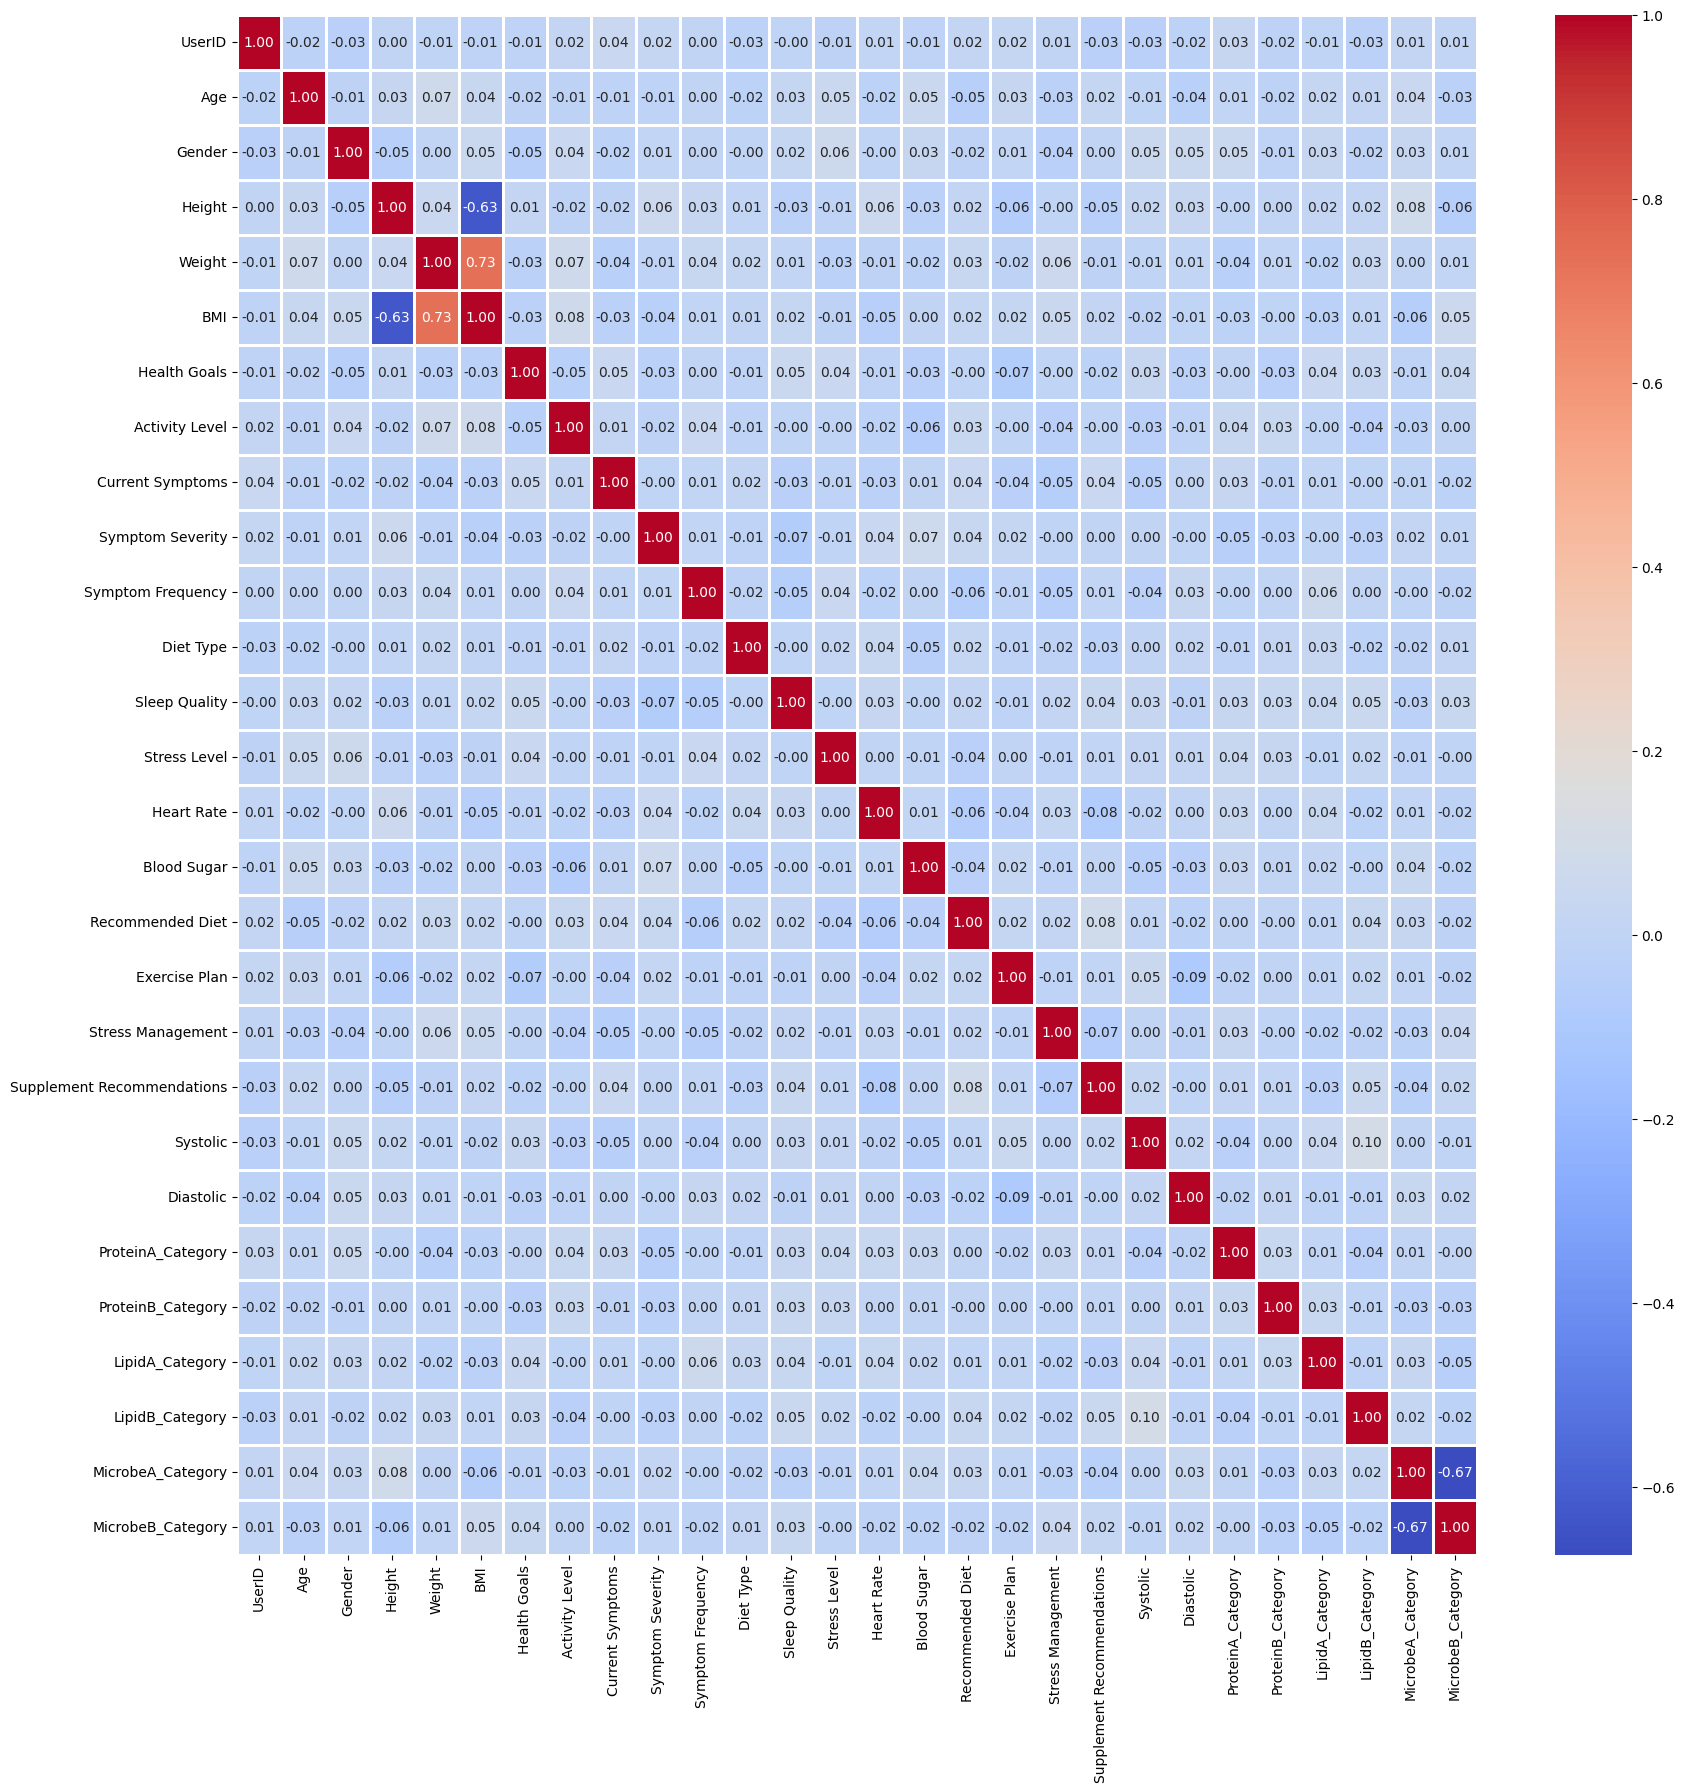

In [545]:
#show a visual representation of the data
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

In [546]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical features to normalize
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [547]:
#show the normalized data
print(df)


       UserID       Age  Gender    Height    Weight       BMI  Health Goals  \
0    0.000000  0.826087       1  0.224490  1.000000  0.813408             1   
1    0.001001  0.608696       0  0.040816  0.693878  0.754425             2   
2    0.002002  0.304348       1  0.897959  0.000000  0.013068             2   
3    0.003003  0.913043       2  0.346939  0.469388  0.427252             2   
4    0.004004  0.152174       1  0.795918  0.714286  0.350788             1   
..        ...       ...     ...       ...       ...       ...           ...   
995  0.995996  0.086957       0  0.102041  0.183673  0.375280             2   
996  0.996997  0.478261       2  0.510204  0.938776  0.593431             0   
997  0.997998  0.195652       2  0.061224  0.448980  0.574488             1   
998  0.998999  0.934783       0  0.775510  0.408163  0.222575             0   
999  1.000000  0.021739       0  0.775510  0.408163  0.222575             0   

     Activity Level  Current Symptoms  Symptom Seve

# Step 3: Model Development



Our targets would be 'Recommended Diet', 'Exercise Plan', 'Stress Management', 'Supplement Recommendations'

In [548]:
# Select the features and the target
X = df.drop(columns=['Recommended Diet', 'Exercise Plan', 'Stress Management', 'Supplement Recommendations'])
y = df[['Recommended Diet', 'Exercise Plan', 'Stress Management', 'Supplement Recommendations']]



from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [580]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score


model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='linear'))
model.add(Dense(32, activation='linear'))
model.add(Dense(4, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Wrap the model using the KerasClassifier
keras_model = KerasClassifier(model)

model.summary()

# Create a pipeline
pipeline = Pipeline([
    ('model', MultiOutputRegressor(keras_model))
])


# Fit the model
pipeline.fit(X_train, y_train, model__epochs=50, model__batch_size=16, model__verbose=0)

# Predict the target values
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

C:\Users\duvan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_523"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1642 (Dense)              │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1643 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1644 (Dense)              │ (None, 4)              │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1645 (Dense)              │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,817 (14.91 KB)

 Trainable params: 3,817 (14.91 KB)

 Non-trainable params: 0 (0.00 B)

C:\Users\duvan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\duvan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(16, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
C:\Users\duvan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\saving\saving_lib.py:415: UserWarnin

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Mean Squared Error: 3.50375
R^2 Score: -1.8099974364075975


In [583]:
# Save the pipeline
import joblib

joblib.dump(pipeline, 'health_recommendations_pipeline.pkl')

# Load the pipeline
pipeline = joblib.load('health_recommendations_pipeline.pkl')


# Predict the target values
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Mean Squared Error: 3.50375
R^2 Score: -1.8099974364075975


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming df is already loaded
X = df.drop(columns=['Recommended Diet', 'Exercise Plan', 'Stress Management', 'Supplement Recommendations'])
y = df[['Recommended Diet', 'Exercise Plan', 'Stress Management', 'Supplement Recommendations']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipelines for both numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
base_model = RandomForestRegressor(random_state=42)
multioutput_model = MultiOutputRegressor(base_model)

# Create a pipeline that first preprocesses the data then fits the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', multioutput_model)])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__estimator__n_estimators': [50, 100, 200],
    'regressor__estimator__max_depth': [10, 20, 30],
    'regressor__estimator__min_samples_split': [2, 5, 10],
    'regressor__estimator__min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='uniform_average')

print(f"Best parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Best parameters: {'regressor__estimator__max_depth': 10, 'regressor__estimator__min_samples_leaf': 1, 'regressor__estimator__min_samples_split': 10, 'regressor__estimator__n_estimators': 200}
Mean Squared Error: [0.7318611  0.72543289 0.70477939 2.98147721]
R^2 Score: -0.07285761011669545


In [ ]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
predictions = pd.concat([X_test, pd.DataFrame(y_pred, columns=y_test.columns)], axis=1)

#print the results
print(train)
print(test)
print(predictions)

       UserID       Age  Gender    Height    Weight       BMI  Health Goals  \
29   0.029029  0.565217       2  0.387755  0.612245  0.486215             0   
535  0.535536  0.434783       0  0.346939  0.346939  0.358123             2   
695  0.695696  0.586957       0  0.367347  0.632653  0.508346             0   
557  0.557558  0.630435       2  0.673469  0.816327  0.449722             2   
836  0.836837  0.608696       2  0.040816  0.510204  0.629257             1   
..        ...       ...     ...       ...       ...       ...           ...   
106  0.106106  0.739130       1  0.489796  0.959184  0.615655             1   
270  0.270270  0.173913       2  0.367347  0.959184  0.690501             0   
860  0.860861  1.000000       0  0.836735  0.448980  0.220357             2   
435  0.435435  0.173913       2  0.428571  0.897959  0.619127             0   
102  0.102102  0.217391       2  1.000000  0.408163  0.154165             2   

     Activity Level  Current Symptoms  Symptom Seve

In [ ]:
# Save the model
import joblib

joblib.dump(best_model, 'health_recommendation_model.pkl')


['health_recommendation_model.pkl']

In [ ]:
#test the model
import joblib
import pandas as pd

# Load the model
model = joblib.load('health_recommendation_model.pkl')

# Create a sample dataframe
data = { "UserID": 1, "Age": 25, "Gender": 0, "Height": 192, "Weight": 96, "BMI": 23.5, "Health Goals": 2, "Activity Level": 3, "Current Symptoms": 0, "Symptom Severity": 2, "Symptom Frequency": 1, "Diet Type": 4, "Sleep Quality": 8, "Stress Level": 5, "Heart Rate": 80, "Blood Sugar": 90, "Recommended Diet": 1, "Exercise Plan": 0, "Stress Management": 1, "Supplement Recommendations": 0, "Systolic": 120, "Diastolic": 80, "ProteinA_Category": 1, "ProteinB_Category": 0, "LipidA_Category": 2, "LipidB_Category": 1, "MicrobeA_Category": 3, "MicrobeB_Category": 1 }
dft = pd.DataFrame(data, index=[0])

# Make a prediction
prediction = model.predict(dft)

# Print the prediction for each target in a health recommendation format output for the user to understand (transform the numerical values back to categorical values)

def get_recommendation(prediction):
    diet = ['Low Carb', 'Low Fat', 'Balanced', 'High Protein', 'Keto']
    exercise = ['Cardio', 'Strength Training', 'Flexibility', 'Balance', 'Endurance']
    stress = ['Meditation', 'Exercise', 'Sleep', 'Nutrition', 'Socialize']
    supplement = ['Vitamin D', 'Omega-3', 'Probiotics', 'Multivitamin', 'Magnesium']

    diet_recommendation = diet[int(prediction[0][0])]
    exercise_recommendation = exercise[int(prediction[0][1])]
    stress_recommendation = stress[int(prediction[0][2])]
    supplement_recommendation = supplement[int(prediction[0][3])]

    return f"Recommended Diet: {diet_recommendation}\nExercise Plan: {exercise_recommendation}\nStress Management: {stress_recommendation}\nSupplement Recommendations: {supplement_recommendation}"


recommendation = get_recommendation(prediction)

print(recommendation)


Recommended Diet: Low Fat
Exercise Plan: Strength Training
Stress Management: Meditation
Supplement Recommendations: Probiotics
